## Homework 2 

• Implement a function that computes the edit distance using the dynamic programming approach.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def brut_distance_recursive(a,b):
    # a and b are strings
    n = len(a)
    m = len(b)
    if m == 0:
        return n
    if n == 0:
        return m

    # If the first characters are the same, no operation is needed
    if a[0] == b[0]:
        return brut_distance_recursive(a[1:], b[1:])

    # Otherwise, consider all three operations and find the minimum
    insert = brut_distance_recursive(a, b[1:])
    delete = brut_distance_recursive(a[1:], b)
    replace = brut_distance_recursive(a[1:], b[1:])

    return 1 + min(insert, delete, replace)


In [3]:
#Test
brut_distance_recursive("suhrnsjhay","saturday")

7

In [4]:
def edit_distance(a,b):
    # a and b are strings
    na = len(a)
    nb = len(b)
    A = np.zeros((na+1, nb+1))
    A[:,0] = np.arange(0,na+1)
    A[0,:] = np.arange(0,nb+1)
    
    for i in range(1,na+1):
        for j in range(1,nb+1):
            if a[i-1] == b[j-1]:   # 
                 A[i,j] = A[i-1,j-1]
            else:
                 A[i,j] = 1 + min(A[i-1,j-1] ,  A[i,j-1],  A[i-1,j] )
    return int(A[-1,-1])
#The last element of the matrix is the distance between a and b
#Chaque ligne est un prefixe de a et chaque colonne est un prefixe de b



In [5]:
#Test
edit_distance("suhrnsjhay","saturday")

7

• Estimate the random complexity time of your algorithm with respect to the maximal length of a words. To this end, for varying lengths n, you may generate between 10^5 and 10^6 random words of length n and compute the average computation time of your algorithm to compute the distance between pairs of your samples. Finally, you can plot your estimations as a function of n.

In [6]:
# Import modules to generate words
import random
import string

#Import module to compute the time
import time

In [7]:
# Function to generate a words of length n
def generate_words(n):
    uppercase_letters = string.ascii_uppercase
    random_letters = ""
    for i in range(n): random_letters +=  random.choice(uppercase_letters)
    return(random_letters)

generate_words(5)

'QDMXU'

In [8]:
# Function to generate a list of num_pairs couple of words of length n
def generate_pairs_words(n, num_pairs):
    l = []
    for i in range(num_pairs):    
        x= generate_words(n)
        y = generate_words(n)
        l.append([x,y])
    return(l)
a = generate_pairs_words(5,4)
a

[['RRMLU', 'LWKBT'],
 ['WKLXW', 'NROAF'],
 ['QBMHL', 'WNGZF'],
 ['OAZZN', 'SFBEU']]

In [9]:
# Function to compute the time of the brut time between two strings in a list with num_pairs couple of words of length n
def computation_time_brut(words_pairs):
    cumputation_time=[]
    for pairs in words_pairs:
        start_time = time.time()
        brut_distance_recursive(pairs[0],pairs[1])
        end_time = time.time()
        cumputation_time.append(end_time - start_time)
    return(cumputation_time)
computation_time_brut(a)

[0.0002720355987548828,
 0.0002720355987548828,
 0.00026988983154296875,
 0.00026988983154296875]

In [10]:
# Function to compute the time of the edit time between two strings in a list with num_pairs couple of words of length n
def computation_time_edit(words_pairs):
    cumputation_time=[]
    for pairs in words_pairs:
        start_time = time.time()
        edit_distance(pairs[0],pairs[1])
        end_time = time.time()
        cumputation_time.append(end_time - start_time)
    return(cumputation_time)
computation_time_edit(a)


[0.0002372264862060547,
 0.0002067089080810547,
 2.5272369384765625e-05,
 0.00017976760864257812]

In [11]:
# We are going to compare the 2 distances

def average_computation_time(max_length, num_pairs):
    results_brut = []
    results_edit=[]
    N = np.arange(1,max_length+1)
    for n in N:
        pairs = generate_pairs_words(n,num_pairs)
        
        average_time_brut = np.mean(computation_time_brut(pairs))
        results_brut.append(average_time_brut)
        
        average_time_edit = np.mean(computation_time_edit(pairs))
        results_edit.append(average_time_edit)
    return(N, results_edit, results_brut)
      


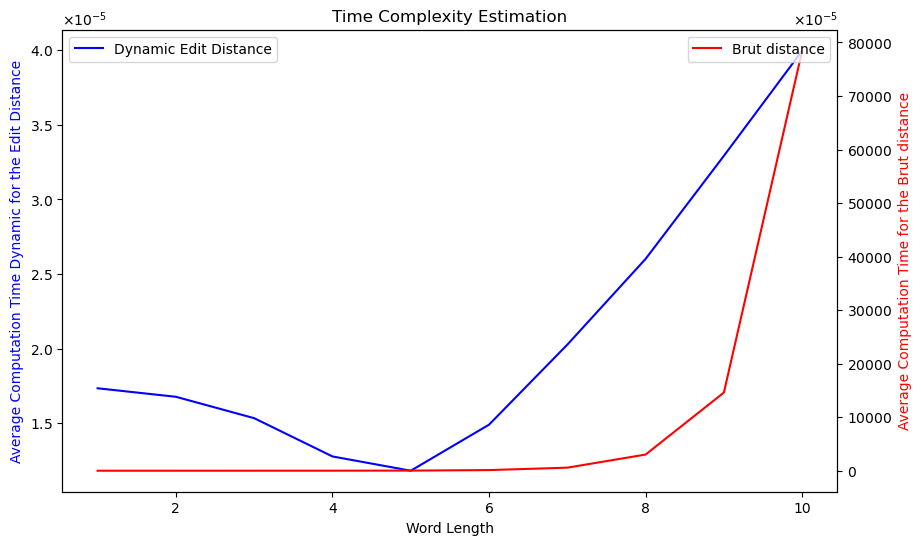

In [16]:
N,r1,r2 = average_computation_time(10, 100)

# Create the figure and axes
fig, host = plt.subplots(figsize=(10, 6))

# Use twinx to create a second y-axis sharing the same x-axis
parasite = host.twinx()

# Plot the curves on the axes
p1, = host.plot(N, r1, label='Dynamic Edit Distance', color="b")
p2, = parasite.plot(N, r2, label='Brut distance', color="r")


# Set the y-axis scale to be in scientific notation with the same exponent
formatter = plt.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-5, -5))  # Set the exponent to -5 for both axes

host.yaxis.set_major_formatter(formatter)
parasite.yaxis.set_major_formatter(formatter)


host.legend(loc="upper left")
parasite.legend(loc="upper right")

# Configure the labels
host.set_xlabel('Word Length')
host.set_ylabel('Average Computation Time Dynamic for the Edit Distance', color="b")
parasite.set_ylabel('Average Computation Time for the Brut distance', color="r")

plt.title('Time Complexity Estimation')
plt.show()

The brut distance computation time is significantly larger

The complexity of the brut distance is O(3^(m+n)) while the the edit distance's complexity is O(n×m) for n and m the lenth of the 2 strings

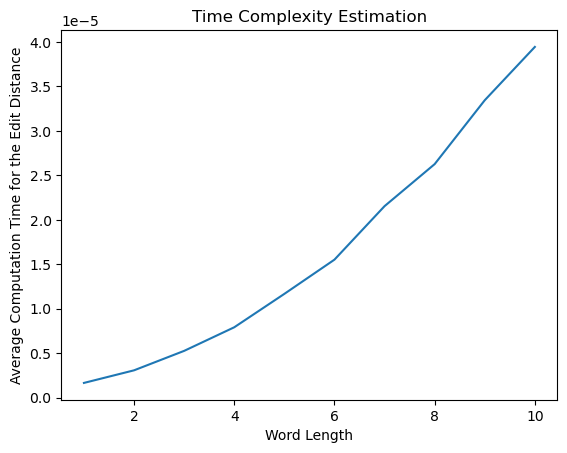

In [15]:
# Plot of the Average Computing Time for the Edit distance for more words

max_length,num_pairs = 10, 5*(10**5)

results=[]
N = np.arange(1,max_length+1)
for n in N:
    pairs = generate_pairs_words(n,num_pairs)
    average_time_edit = np.mean(computation_time_edit(pairs))
    results.append(average_time_edit)
    
    
plt.plot(N, results)
plt.xlabel('Word Length')
plt.ylabel('Average Computation Time for the Edit Distance')
plt.title('Time Complexity Estimation')
plt.show()